In [15]:
import pandas as pd
import numpy as np
import plotly.express as px 
import matplotlib.pyplot as plt
import seaborn as sns 

In [16]:
df = pd.read_csv('medical-charges.csv')
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
977,26,male,29.150,1,no,southeast,2902.90650
1093,22,female,30.400,0,yes,northwest,33907.54800
637,35,female,38.095,2,no,northeast,24915.04626
193,56,female,26.600,1,no,northwest,12044.34200
1121,46,male,38.170,2,no,southeast,8347.16430


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [18]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Inferences from looking at the table above:**
- The ranges of values in the numerical columns seem reasonable:
    + Range age: 18 - 64
    + Range bmi: 15.96 - 53.13
    + Children: 0 - 5
    + charges: 1121.87 - 63770.43
- The charges column seems to be significantly skewed (std 12110)

### Age

In [19]:
#Visulize the distribution of age using histogram with 47 bins and a box plot
fig = px.histogram(df, x='age', marginal='box', nbins=47, title="Distribution of Age")
fig.update_layout(bargap=0.1)
fig.show()

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages<br>

### Body Mass Index

In [20]:
fig = px.histogram(df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['green'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

The measurements of body mass index seem form a Gaussian distribution centered around the value 30, with a few outliers towards the right. 

### Charnge 

In [21]:
fig = px.histogram(df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

For most customers, the annual medical charges are under 10K. Only a small fraction of customer have higher medical expenses <br>
There is a significant different in medical expenses between smokers and non-smokers. While the median for non-smokers is $7300, the median for smokers is close to 35000

In [22]:
fig = px.histogram(df, 
                   x='charges', 
                   marginal='box', 
                   color='sex', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [23]:
fig = px.histogram(df, 
                   x='charges', 
                   marginal='box', 
                   color='region', 
                   color_discrete_sequence=['green', 'grey','blue','yellow'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [24]:
fig = px.scatter(df,
                x='age',
                y='charges',
                color = 'smoker',
                opacity = 0.8,
                hover_data = ['sex'],
                title = 'Age vs. Charges')
fig.update_traces(marker_size = 5)
fig.show()

In [25]:
fig = px.scatter(df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [26]:
fig = px.violin(df, y='charges', color='smoker', box=True, points='all')
fig.show()

<AxesSubplot:>

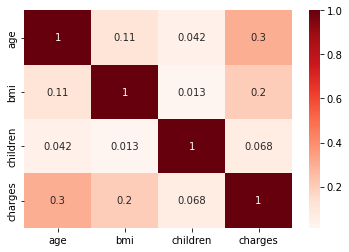

In [27]:
sns.heatmap(df.corr(), cmap='Reds', annot=True)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()

In [30]:
non_smoker_df = df[df['smoker']=='no']

In [31]:
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [32]:
inputs = non_smoker_df['age']
targets = non_smoker_df['charges']

In [35]:
x = inputs.values.reshape(-1,1)
#array 1 column and multiple row

In [37]:
y = targets.ravel()
#array 1 row and multiple column

In [38]:
model.fit(x, y)

LinearRegression()

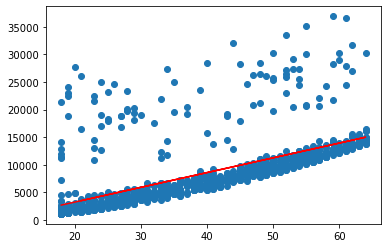

In [39]:
predictions = model.predict(x)
plt.scatter(inputs, targets)
plt.plot(inputs, predictions, color='red')
plt.show()

In [40]:
model.score(x, y)

0.3943171632425906

### Linear Regression using Multiple Features

In [41]:
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']


In [42]:
model = LinearRegression().fit(inputs, targets)

In [43]:
model.score(inputs, targets)

0.3943672876561962

In [44]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488672)

In [45]:
inputs, targets = non_smoker_df[['age', 'bmi','children']], non_smoker_df['charges']

### Using Categorical Features for Machine Learning

<AxesSubplot:xlabel='smoker', ylabel='charges'>

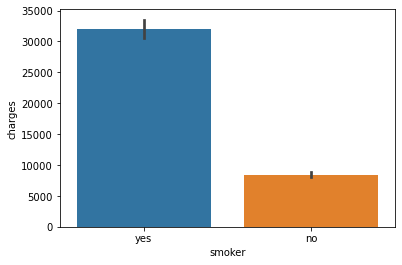

In [46]:
sns.barplot(data=df, x='smoker', y='charges')

In [47]:
smoker_codes = {'no':0, 'yes':1}
df['smoker_code'] = df['smoker'].map(smoker_codes)

In [48]:
df['charges'].corr(df['smoker_code'])

0.7872514304984785

In [49]:
inputs, targets = df[['age', 'bmi','children', 'smoker_code']], df['charges']

In [50]:
model = LinearRegression().fit(inputs, targets)
model.score(inputs, targets)

0.749694530346479

In [51]:
df.loc[1]

age                   18
sex                 male
bmi                33.77
children               1
smoker                no
region         southeast
charges        1725.5523
smoker_code            0
Name: 1, dtype: object